### WHAT IS DYNAMIC TIME WARPING ?


In [2]:
# IT IS THE ALGORITHM USED TO MEASURE THE SIMILARITY BETWEEN THE TWO TIME SERIES DATA
# IT FINDS THE OPTIMAL ALIGNMENT ALIGNMENT BETWEEN THE SERIES .IT CAN PERFORM ALLIGNMENT OF NON LINEAR DATA ALSO,THAT IS SPECIALITY IN THE DTW
# IT ALLIGNS THE TWO SIGNALS BY STRECHING AND COMPRESSING,HENCE IT IS CALLED WARPING.

### WHAT IS OPTIMAL ALIGNMENT ?

In [4]:
# OPTIMAL ALIGNMENT REFERS TO THE BEST POSSIBLE ALIGNMENT THAT MATCHES TWO SIGNALS BY MINIMIZING THE PREDEFINED COST OR DISTANCE FUNCTION.

In [5]:
pip install fastdtw

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install dtaidistance

Note: you may need to restart the kernel to use updated packages.


## 1)PERFOMING THE DTW DISTANCE ON THE SYNTHETIC DATA

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from fastdtw  import fastdtw 

In [9]:
well_log_1 = np.array([1, 2, 3, 4, 2, 3, 1])
well_log_2 = np.array([1, 1, 2, 3, 4, 3, 2])

distance, path = fastdtw(well_log_1, well_log_2, dist=lambda x, y: euclidean([x], [y]))
distance,path

(2.0, [(0, 0), (0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 5), (6, 6)])

### PLOTTING THE DISTANCE MATRIX OF THE TWO WELL LOG DATA BY HEAT MAPS

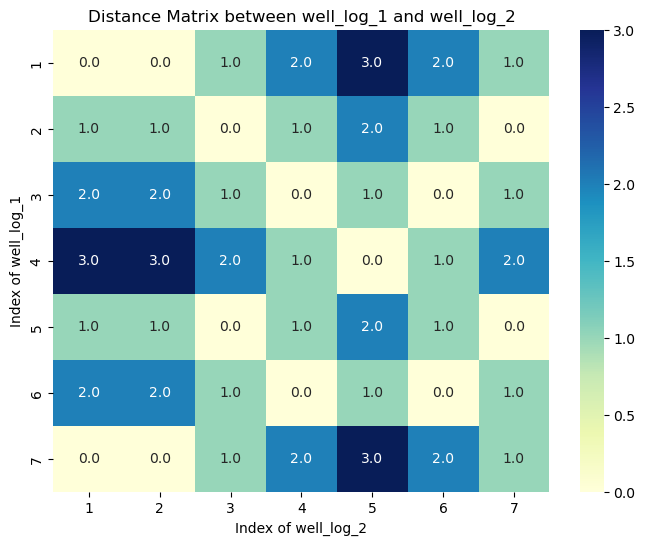

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
import seaborn as sns

# Define the sequences (well logs)
well_log_1 = np.array([1, 2, 3, 4, 2, 3, 1])
well_log_2 = np.array([1, 1, 2, 3, 4, 3, 2])

# Initialize the distance matrix
distance_matrix = np.zeros((len(well_log_1), len(well_log_2)))

# Calculate the pairwise Euclidean distance
for i in range(len(well_log_1)):
    for j in range(len(well_log_2)):
        distance_matrix[i, j] = abs(well_log_1[i] - well_log_2[j])  # Euclidean for 1D

# Plot the distance matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(distance_matrix, annot=True, fmt=".1f", cmap="YlGnBu", 
            xticklabels=range(1, len(well_log_2) + 1), 
            yticklabels=range(1, len(well_log_1) + 1))
plt.title("Distance Matrix between well_log_1 and well_log_2")
plt.xlabel("Index of well_log_2")
plt.ylabel("Index of well_log_1")
plt.show()


### INTERPRETING AND VISUALIZING THE DTW DISTANCE AND OPTIMAL ALLIGNMENT PATH ON THE HEAT MAP

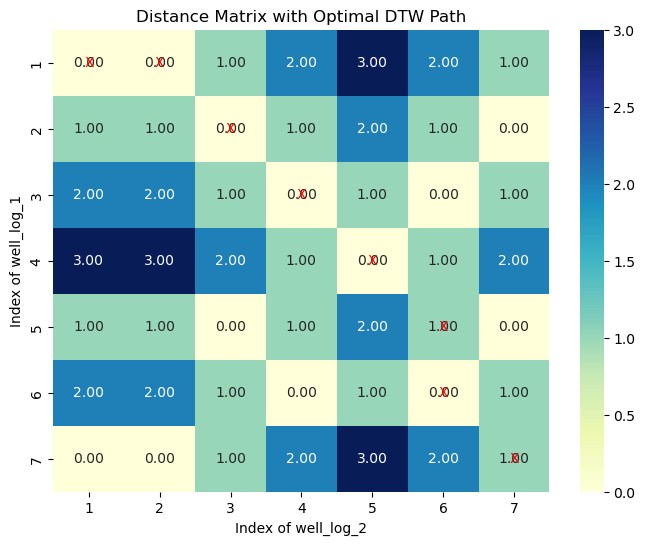

DTW Distance: 2.0
DTW Path: [(0, 0), (0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 5), (6, 6)]


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean  
import seaborn as sns
from fastdtw import fastdtw

# Define the sequences (well logs)
well_log_1 = np.array([1, 2, 3, 4, 2, 3, 1])
well_log_2 = np.array([1, 1, 2, 3, 4, 3, 2])

# Calculate DTW distance and path
distance, path = fastdtw(well_log_1, well_log_2, dist=lambda x, y: euclidean([x], [y]))

# Initialize the distance matrix
distance_matrix = np.zeros((len(well_log_1), len(well_log_2)))

# Calculate the pairwise Euclidean distance
for i in range(len(well_log_1)):
    for j in range(len(well_log_2)):
        distance_matrix[i, j] = abs(well_log_1[i] - well_log_2[j])

# Plot the distance matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(distance_matrix, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=range(1, len(well_log_2)+1), yticklabels=range(1, len(well_log_1)+1))

# Overlay the optimal path on the heatmap
for (i, j) in path:
    plt.text(j+0.5 , i+0.5 , 'X', color='red', ha='center', va='center')

plt.title("Distance Matrix with Optimal DTW Path")
plt.xlabel("Index of well_log_2")
plt.ylabel("Index of well_log_1")
plt.show()

# Output DTW distance and path
print(f"DTW Distance: {distance}")
print(f"DTW Path: {path}")


###  FOR CALCULATING THE ALLIGNED WELL LOGS

In [15]:

# Create aligned sequences
aligned_well_log_1 = []
aligned_well_log_2 = []

# Using the DTW path to align the sequences
for (i, j) in path:
    aligned_well_log_1.append(well_log_1[i])
    aligned_well_log_2.append(well_log_2[j])

# Convert aligned lists to numpy arrays (optional)
aligned_well_log_1 = np.array(aligned_well_log_1)
aligned_well_log_2 = np.array(aligned_well_log_2)


print("Aligned Well Log 1:", aligned_well_log_1)
print('Orginal well log 1:',well_log_1)
print("Aligned Well Log 2:", aligned_well_log_2)
print('Orginal well log 2:',well_log_2)


Aligned Well Log 1: [1 1 2 3 4 2 3 1]
Orginal well log 1: [1 2 3 4 2 3 1]
Aligned Well Log 2: [1 1 2 3 4 3 3 2]
Orginal well log 2: [1 1 2 3 4 3 2]


In [16]:
np.random.normal()

1.060879489562633

DTW distance between the two well logs: 25.689805172981405
Allignment path : [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (1, 13), (2, 14), (3, 15), (4, 16), (5, 17), (6, 18), (7, 19), (8, 20), (9, 21), (10, 22), (11, 23), (12, 24), (13, 25), (14, 26), (15, 27), (16, 28), (17, 29), (18, 30), (19, 31), (20, 32), (21, 33), (22, 34), (23, 35), (24, 36), (25, 37), (26, 38), (27, 39), (28, 40), (29, 41), (30, 42), (31, 43), (32, 44), (33, 45), (34, 46), (35, 47), (36, 48), (37, 49), (38, 50), (39, 51), (40, 52), (41, 53), (42, 54), (43, 55), (44, 56), (45, 57), (46, 58), (47, 59), (48, 60), (49, 61), (50, 62), (51, 63), (52, 64), (53, 65), (54, 66), (55, 67), (56, 68), (57, 69), (58, 70), (59, 71), (60, 72), (61, 73), (62, 74), (63, 75), (64, 76), (65, 77), (66, 78), (67, 79), (68, 80), (69, 81), (70, 82), (71, 83), (72, 84), (73, 85), (74, 86), (75, 87), (76, 88), (77, 89), (78, 90), (79, 91), (80, 92), (81, 93), (82, 94), (83,

Text(0, 0.5, 'ALLIGNED WELL LOG 2')

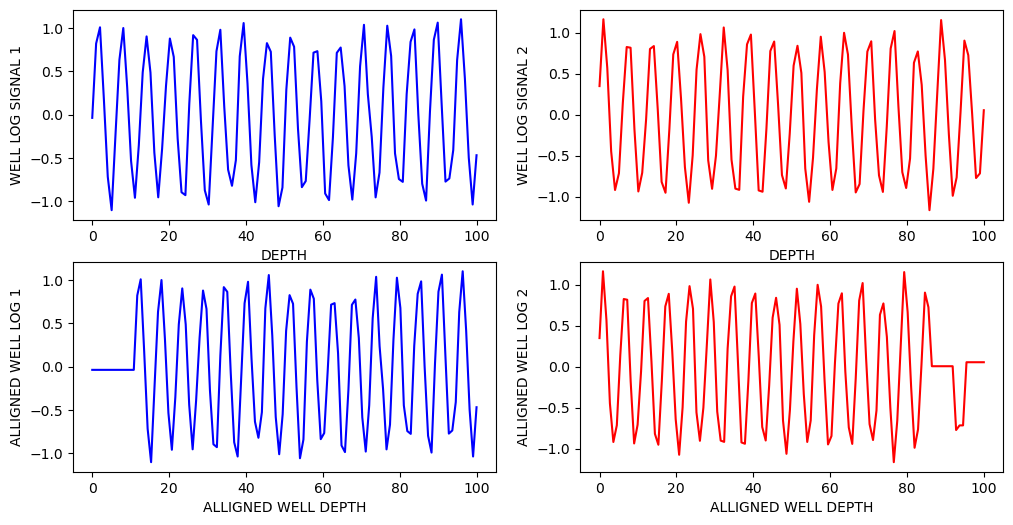

In [83]:
import numpy as np
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt
depth = np.linspace(0, 100, 100)  
well_log_1_1 = np.sin(depth) + np.random.normal(loc=0, scale=0.1,size =len(depth)) 
well_log_2_2 = np.sin(depth + 0.5) + np.random.normal(loc=0,scale=0.1, size=len(depth))

distance,path=fastdtw(well_log_1_1,well_log_2_2,dist=lambda  x,y : euclidean([x],[y]),radius = 1)
alligned_well_log_1_1=[well_log_1_1[i]for (i,j) in path]
alligned_well_log_2_2=[well_log_2_2[j] for (i,j) in path]
alligned_depth = np.linspace(0,100,len(alligned_well_log_1_1))
print(f"DTW distance between the two well logs: {distance}")
print(f"Allignment path : {path}")
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
plt.plot(depth,well_log_1_1,label="well_log_1",color='blue')
plt.xlabel("DEPTH")
plt.ylabel('WELL LOG SIGNAL 1')
plt.subplot(2,2,2)
plt.plot(depth,well_log_2_2,label='well_log_2',color='red')
plt.xlabel("DEPTH")
plt.ylabel('WELL LOG SIGNAL 2')
plt.subplot(2,2,3)
plt.plot(alligned_depth,alligned_well_log_1_1,label='alligned_well_log_1',color = 'blue')
plt.xlabel('ALLIGNED WELL DEPTH')
plt.ylabel('ALLIGNED WELL LOG 1')
plt.subplot(2,2,4)
plt.plot(alligned_depth,alligned_well_log_2_2,label='alligned_well_log_2',color = 'red')
plt.xlabel('ALLIGNED WELL DEPTH')
plt.ylabel('ALLIGNED WELL LOG 2')

In [85]:
len(alligned_well_log_1_1)

112

In [87]:
len(well_log_1_1)

100

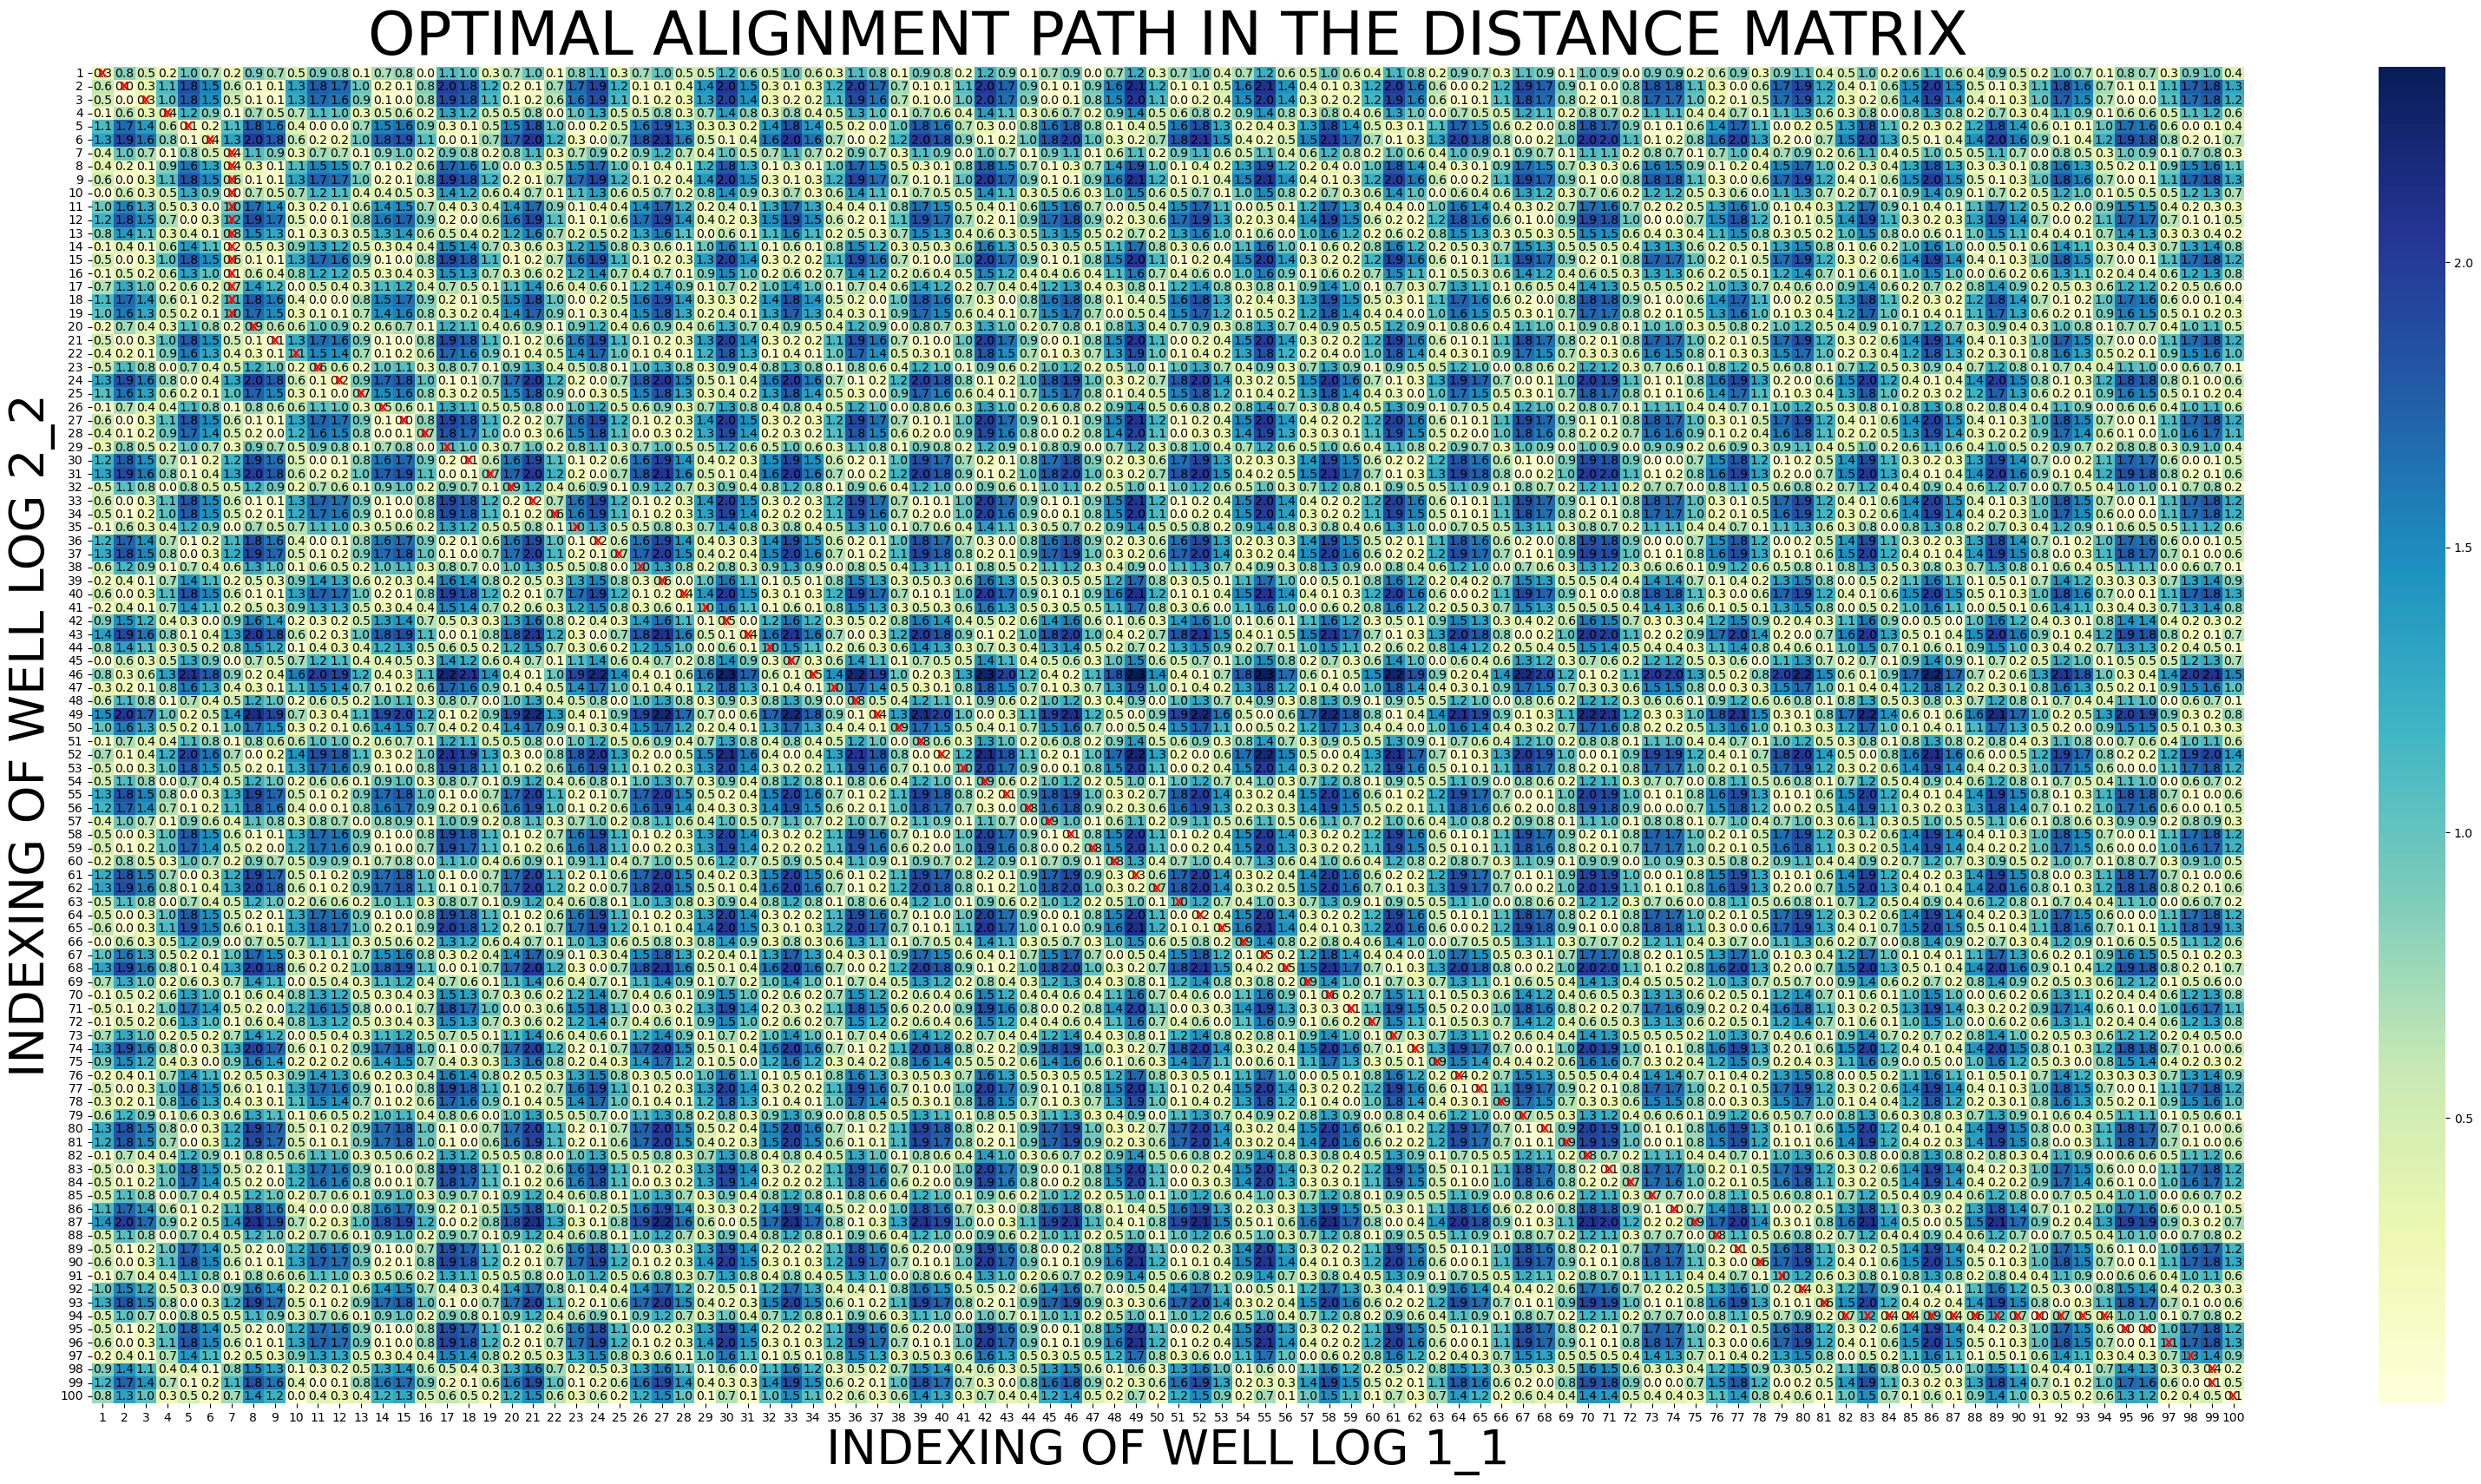

In [18]:
# DISTANCE MATRIX

distance_matrix = np.zeros((len(well_log_1_1),len(well_log_2_2)))
for i in range(len(well_log_1_1)):
    for j in range(len(well_log_2_2)):
        distance_matrix[i,j] = euclidean([well_log_1_1[i]],[well_log_2_2[j]])
plt.figure(figsize=(40,20))
sns.heatmap(distance_matrix,annot=True,fmt='.1f',cmap="YlGnBu",annot_kws={"size": 10, "color": "black"}, 
    cbar=True, xticklabels=range(1, len(well_log_2_2)+1), yticklabels=range(1, len(well_log_1_1)+1))
for (i,j) in path:
    plt.text(i+0.5,j+0.5,'X',va='center',ha='center',color='red',fontweight='bold')
plt.xlabel('INDEXING OF WELL LOG 1_1',fontsize=40)
plt.ylabel('INDEXING OF WELL LOG 2_2',fontsize=40)
plt.title('OPTIMAL ALIGNMENT PATH IN THE DISTANCE MATRIX',fontsize=50)
plt.show()

### SEEING THE DIFFERENCE BETWEEN THE ALLIGNMENT BEFORE AND AFTER APPLYING THE DTW


Text(0.5, 1.0, ' AFTER DTW')

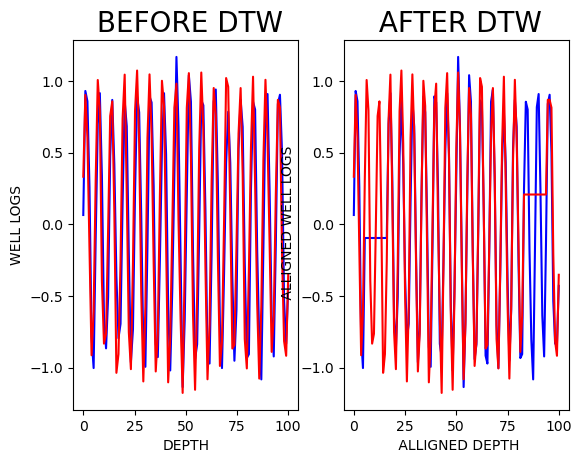

In [20]:
# BEFORE DTW
plt.subplot(1,2,1)
plt.plot(depth,well_log_1_1,label='well_log_1_1',color='blue')
plt.plot(depth,well_log_2_2,label='well_log_2_2',color='red')
plt.xlabel('DEPTH')
plt.ylabel('WELL LOGS')
plt.title(' BEFORE DTW',fontsize=20)

# AFTER DTW
plt.subplot(1,2,2)
plt.plot(alligned_depth,alligned_well_log_1_1,label='well_log_1',color='blue')
plt.plot(alligned_depth,alligned_well_log_2_2,label='well_log_2',color='red')
plt.xlabel(' ALLIGNED DEPTH')
plt.ylabel(' ALLIGNED WELL LOGS')
plt.title(' AFTER DTW',fontsize=20)



DTW distance: 9.198101926243027
path:[(0, 0), (1, 1), (2, 1), (3, 2), (4, 2), (5, 2), (6, 3), (7, 4), (8, 4), (9, 5), (10, 6), (10, 7), (11, 8), (12, 9), (13, 10), (14, 11), (15, 12), (16, 13), (17, 14), (18, 15), (19, 16), (20, 17), (21, 18), (22, 19), (23, 20), (24, 20), (25, 21), (26, 22), (27, 22), (28, 23), (29, 23), (30, 24), (30, 25), (31, 26), (31, 27), (32, 28), (32, 29), (33, 30), (34, 31), (35, 31), (36, 31), (37, 31), (38, 32), (38, 33), (39, 34), (39, 35), (39, 36), (40, 37), (41, 37), (42, 37), (43, 38), (44, 39), (45, 39), (46, 40), (47, 41), (48, 42), (49, 42), (50, 43), (51, 44), (51, 45), (52, 46), (52, 47), (53, 48), (54, 49), (55, 50), (56, 51), (56, 52), (57, 53), (58, 53), (59, 54), (60, 55), (61, 56), (62, 57), (63, 58), (64, 59), (65, 60), (66, 60), (67, 61), (67, 62), (67, 63), (68, 64), (69, 64), (70, 65), (71, 65), (72, 65), (73, 66), (73, 67), (74, 68), (75, 69), (76, 69), (77, 69), (78, 69), (79, 69), (80, 69), (81, 70), (81, 71), (81, 72), (82, 73), (83, 7

Text(0.5, 1.0, 'AFTER DTW')

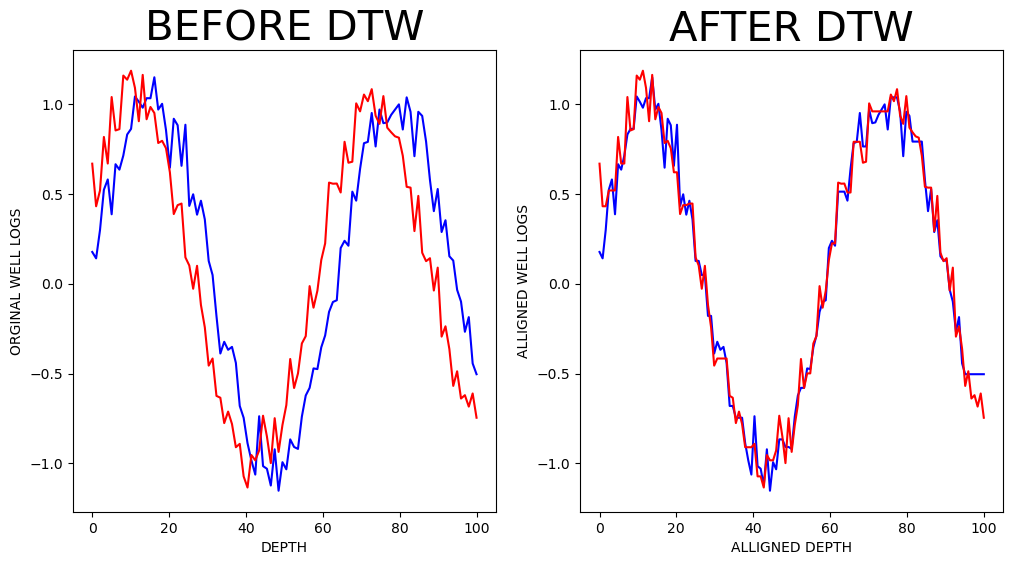

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

# ORIGINAL WELL LOGS

np.random.seed(0)
depth = np.linspace(0, 100, 100)  
well_log_1 = np.sin(np.linspace(0, 10, 100)) + np.random.normal(0, 0.1, 100)
well_log_2 = np.sin(np.linspace(0.5, 10.5, 100)) + np.random.normal(0, 0.1, 100)
distance,path=fastdtw(well_log_1,well_log_2,dist=lambda x,y: euclidean([x],[y]))
print(f"DTW distance: {distance}")
print(f"path:{path}")

# ALLIGNED WELL LOGS AFTER DTW

alligned_well_log_1=[well_log_1[i] for (i,j) in path]
alligned_well_log_2=[well_log_2[j] for (i,j) in path] 
alligned_depth = np.linspace(0,100,len(alligned_well_log_1))
print(alligned_well_log_1)
print(alligned_well_log_2)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(depth,well_log_1,color='blue')
plt.plot(depth,well_log_2,color='red')
plt.ylabel('ORGINAL WELL LOGS')
plt.xlabel('DEPTH')
plt.title('BEFORE DTW',fontsize=30)
plt.subplot(1,2,2)
plt.plot(alligned_depth,alligned_well_log_1,color='blue')
plt.plot(alligned_depth,alligned_well_log_2,color='red')
plt.xlabel('ALLIGNED DEPTH')
plt.ylabel('ALLIGNED WELL LOGS')
plt.title('AFTER DTW',fontsize=30)

### ON REAL TIME DATA

In [23]:
import pandas as pd
df1=pd.read_excel('data_2.xlsx')
df1.columns=[f'well_log_data{i+1}' for i in range(709)]
df1.head()
df1.shape

(2999, 709)

In [24]:
df1.shape

(2999, 709)

In [25]:
df1.head()

well_log_data1  well_log_data2  well_log_data3  well_log_data4  \
0       -0.077591        0.740433        0.169373        0.599976   
1        0.122147        0.786514        0.019760        0.913315   
2        0.322952        0.751419       -0.144501        1.093750   
3        0.454788        0.678940       -0.220795        1.231918   
4        0.525742        0.605698       -0.146790        1.329193   

   well_log_data5  well_log_data6  well_log_data7  well_log_data8  \
0        1.950912        1.081314       -0.157242        1.768799   
1        1.363907        2.126541       -0.484009        0.435410   
2        0.643005        3.010864       -0.552750       -0.783768   
3       -0.048065        3.705978       -0.727310       -1.676254   
4       -0.736313        4.136887       -0.994339       -2.016373   

   well_log_data9  well_log_data10  ...  well_log_data700  well_log_data701  \
0       -2.150650         1.593857  ...          0.056992          0.047150   
1       -2.129898         2.189331  ...          0.053711          0.062408   
2       -1.842194         2.485428  ...          0.050507          0.051956   
3       -1.122284         2.801437  ...          0.052795          0.036545   
4       -0.271301         2.626953  ...          0.055542          0.025024   

   well_log_data702  well_log_data703  well_log_data704  well_log_data705  \
0         -0.056229         -0.002289          0.061722         -0.034409   
1         -0.069427         -0.008316          0.077362         -0.046005   
2         -0.004196         -0.014801          0.087662         -0.053558   
3         -0.012207         -0.023422          0.083237         -0.056610   
4         -0.078659         -0.036621          0.073929         -0.064697   

   well_log_data706  well_log_data707  well_log_data708  well_log_data709  
0         -0.043564         -0.014267         -0.014267         -0.039291  
1         -0.038147         -0.018234         -0.019226         -0.041809  
2         -0.036469         -0.023041         -0.023499         -0.059967  
3         -0.034866         -0.018921         -0.032959         -0.080109  
4         -0.029602         -0.019379         -0.031204         -0.083466  

[5 rows x 709 columns]

In [26]:
df1.isnull().sum()*100

well_log_data1      0
well_log_data2      0
well_log_data3      0
well_log_data4      0
well_log_data5      0
                   ..
well_log_data705    0
well_log_data706    0
well_log_data707    0
well_log_data708    0
well_log_data709    0
Length: 709, dtype: int64

In [27]:
well_log_data1=df1['well_log_data1']
well_log_data1

0      -0.077591
1       0.122147
2       0.322952
3       0.454788
4       0.525742
          ...   
2994    0.926666
2995    1.022797
2996    1.166534
2997    1.302795
2998    1.410599
Name: well_log_data1, Length: 2999, dtype: float64

In [28]:
well_log_data2=df1['well_log_data2']
well_log_data2

0       0.740433
1       0.786514
2       0.751419
3       0.678940
4       0.605698
          ...   
2994    0.141907
2995    0.018082
2996   -0.119629
2997   -0.197678
2998   -0.206680
Name: well_log_data2, Length: 2999, dtype: float64

In [29]:
depth=np.linspace(0,100,2999)

Text(0, 0.5, 'WELL LOG 1')

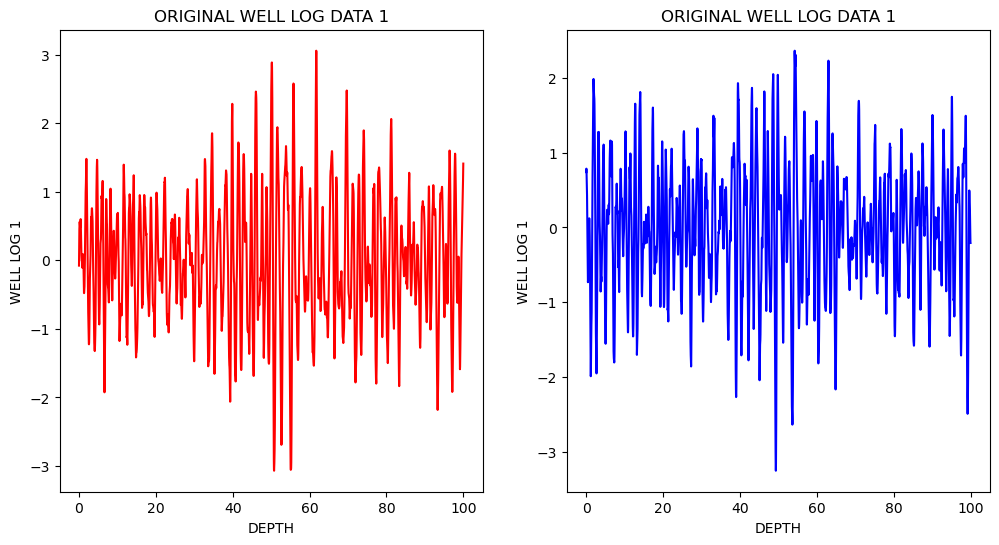

In [30]:
well_log_data1=df1['well_log_data1']
well_log_data2=df1['well_log_data2']
depth=np.linspace(0,100,2999)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(depth,well_log_data1,color='red')
plt.title("ORIGINAL WELL LOG DATA 1")
plt.xlabel('DEPTH')
plt.ylabel('WELL LOG 1')
plt.subplot(1,2,2)
plt.plot(depth,well_log_data2,color='blue')
plt.title("ORIGINAL WELL LOG DATA 1")
plt.xlabel('DEPTH')
plt.ylabel('WELL LOG 1')


In [31]:
# PATH AND DTW DISTANCE BETWEEN WELL LOGS

In [32]:
distance,path = fastdtw(well_log_data1,well_log_data2)
distance
path
print(f'DTW DISTANCE :{distance}')
print(f'ALLIGNMENT PATH :{path}')
alligned_well_log_data1=[well_log_data1[i] for (i,j) in path]
alligned_well_log_data2=[well_log_data2[j] for (i,j) in path]
alligned_depth = np.linspace(0,100,len(alligned_well_log_data2))
print(alligned_depth)


DTW DISTANCE :1113.8048553466797
ALLIGNMENT PATH :[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 5), (7, 5), (8, 5), (9, 5), (10, 5), (11, 5), (12, 5), (13, 5), (14, 5), (15, 6), (16, 7), (17, 7), (18, 8), (19, 8), (20, 8), (21, 8), (22, 8), (23, 8), (24, 9), (25, 10), (26, 11), (26, 12), (26, 13), (26, 14), (26, 15), (26, 16), (26, 17), (26, 18), (27, 19), (28, 20), (29, 21), (30, 22), (30, 23), (30, 24), (31, 25), (32, 26), (33, 26), (34, 26), (35, 27), (36, 27), (37, 28), (38, 29), (39, 30), (40, 31), (40, 32), (40, 33), (40, 34), (40, 35), (40, 36), (40, 37), (40, 38), (40, 39), (40, 40), (40, 41), (40, 42), (40, 43), (41, 44), (42, 45), (43, 45), (44, 45), (45, 46), (46, 46), (47, 47), (48, 48), (49, 49), (50, 49), (51, 50), (52, 51), (53, 51), (54, 51), (55, 52), (56, 52), (57, 53), (58, 54), (58, 55), (58, 56), (58, 57), (58, 58), (58, 59), (58, 60), (58, 61), (58, 62), (58, 63), (58, 64), (59, 65), (60, 66), (61, 67), (62, 67), (63, 68), (64, 69), (65, 70), (66, 70), (67,

### SEEING THE DIFFERENCE BETWEEN THE ALLIGNMENT BEFORE AND AFTER APPLYING THE DTW

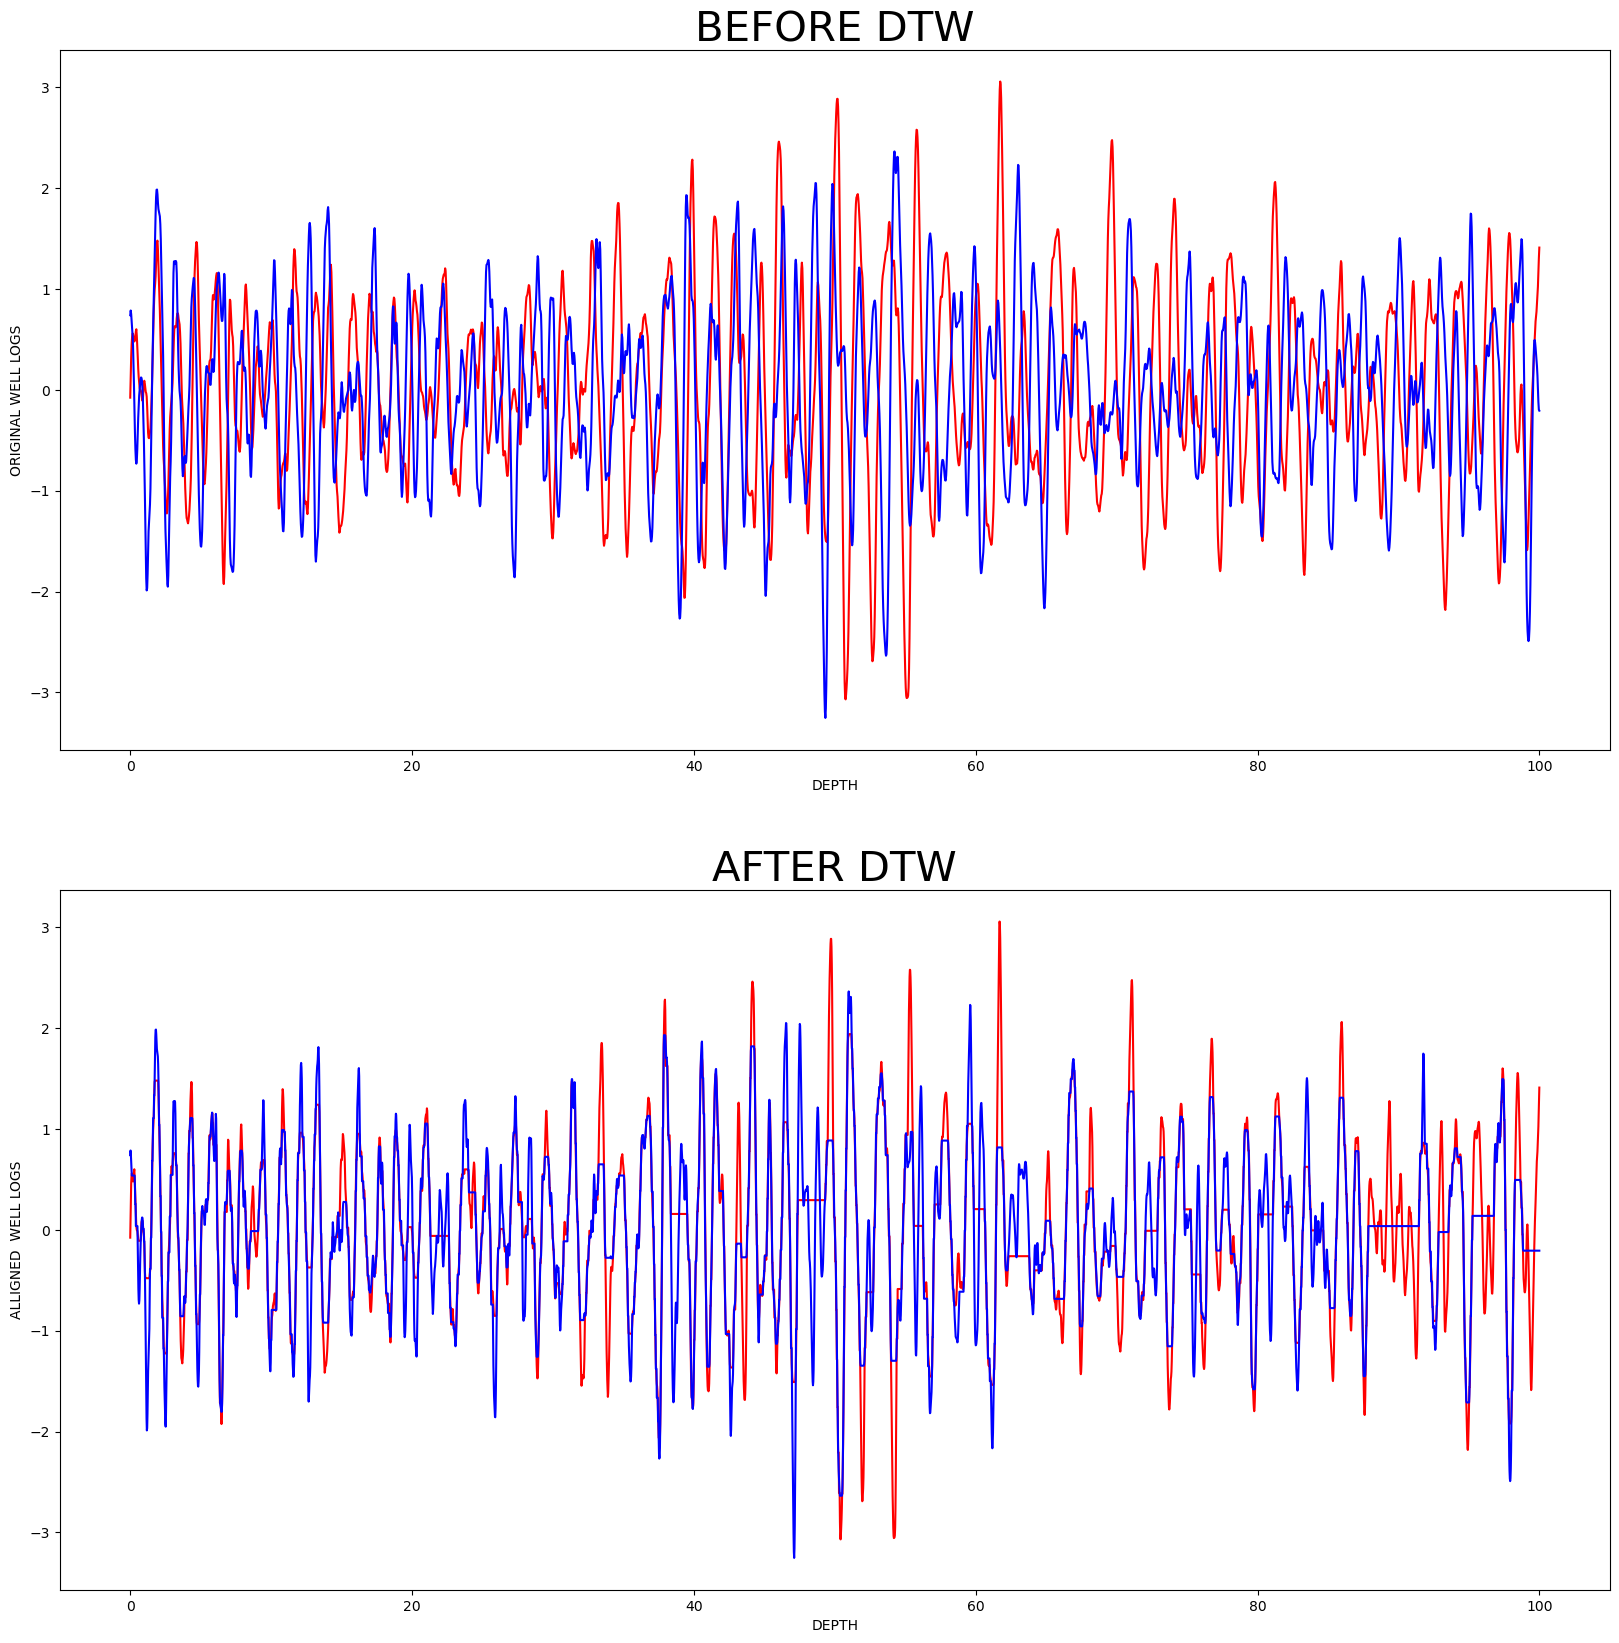

In [34]:
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
plt.plot(depth,well_log_data1,color='red')
plt.plot(depth,well_log_data2,color='blue')
plt.xlabel('DEPTH')
plt.ylabel('ORIGINAL WELL LOGS')
plt.title('BEFORE DTW',fontsize=30)
plt.subplot(2,1,2)
plt.plot(alligned_depth,alligned_well_log_data1,color='red')
plt.plot(alligned_depth,alligned_well_log_data2,color='blue')
plt.xlabel('DEPTH')
plt.ylabel('ALLIGNED  WELL LOGS')
plt.title('AFTER DTW',fontsize=30)
plt.show()


## APPLICATIONS OF DTW IN THE GEOPHYICS AND IN THE OIL AND GAS INDUSTRY

In [36]:
import obspy
st = obspy.read("file_7218.sgy",format='SEGY')
print(st)
traces=st.traces

1983 Trace(s) in Stream:

Seq. No. in line:    0 | 2023-12-25T15:41:48.000000Z - 2023-12-25T15:41:59.996000Z | 250.0 Hz, 3000 samples
...
(1981 other traces)
...
Seq. No. in line:    0 | 2023-12-25T15:41:48.000000Z - 2023-12-25T15:41:59.996000Z | 250.0 Hz, 3000 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]


In [37]:
traces

[Seq. No. in line:    0 | 2023-12-25T15:41:48.000000Z - 2023-12-25T15:41:59.996000Z | 250.0 Hz, 3000 samples,
 Seq. No. in line:    0 | 2023-12-25T15:41:48.000000Z - 2023-12-25T15:41:59.996000Z | 250.0 Hz, 3000 samples,
 Seq. No. in line:    0 | 2023-12-25T15:41:48.000000Z - 2023-12-25T15:41:59.996000Z | 250.0 Hz, 3000 samples,
 Seq. No. in line:    0 | 2023-12-25T15:41:48.000000Z - 2023-12-25T15:41:59.996000Z | 250.0 Hz, 3000 samples,
 Seq. No. in line:    0 | 2023-12-25T15:41:48.000000Z - 2023-12-25T15:41:59.996000Z | 250.0 Hz, 3000 samples,
 Seq. No. in line:    0 | 2023-12-25T15:41:48.000000Z - 2023-12-25T15:41:59.996000Z | 250.0 Hz, 3000 samples,
 Seq. No. in line:    0 | 2023-12-25T15:41:48.000000Z - 2023-12-25T15:41:59.996000Z | 250.0 Hz, 3000 samples,
 Seq. No. in line:    0 | 2023-12-25T15:41:48.000000Z - 2023-12-25T15:41:59.996000Z | 250.0 Hz, 3000 samples,
 Seq. No. in line:    0 | 2023-12-25T15:41:48.000000Z - 2023-12-25T15:41:59.996000Z | 250.0 Hz, 3000 samples,
 Seq. No. 

In [38]:
trace1=traces[0]
trace1

Seq. No. in line:    0 | 2023-12-25T15:41:48.000000Z - 2023-12-25T15:41:59.996000Z | 250.0 Hz, 3000 samples

In [39]:
time=trace1.times()
amplitude=trace1.data
print(time)
print(amplitude)

[0.0000e+00 4.0000e-03 8.0000e-03 ... 1.1988e+01 1.1992e+01 1.1996e+01]
[ 0.00867792  0.00831125  0.00611121 ... -0.00415562 -0.00220004
 -0.00207781]


In [40]:
start_time=3.5
end_time=6
mask=(time>=start_time) & (time<=end_time)
time_selected=time[mask]
amplitude_selected=amplitude[mask]

Text(0.5, 1.0, 'SEISMIC DATA')

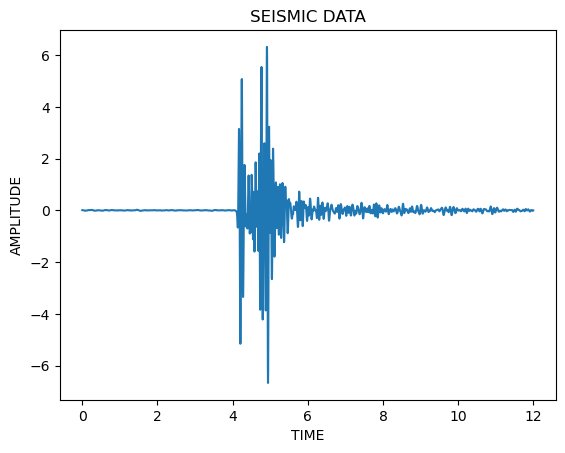

In [41]:
import matplotlib.pyplot as plt
plt.plot(time, amplitude)
plt.xlabel('TIME')
plt.ylabel('AMPLITUDE')
plt.title('SEISMIC DATA')

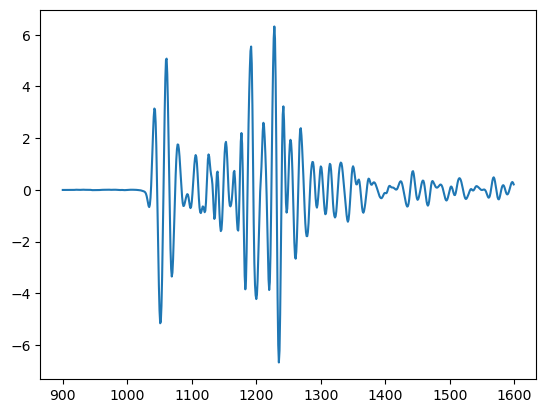

In [42]:
start,end=900,1600
trace_subset=trace1[start:end]
x_values=np.arange(start,end)
plt.plot(x_values,trace_subset)

Text(0.5, 1.0, 'SEISMIC DATA')

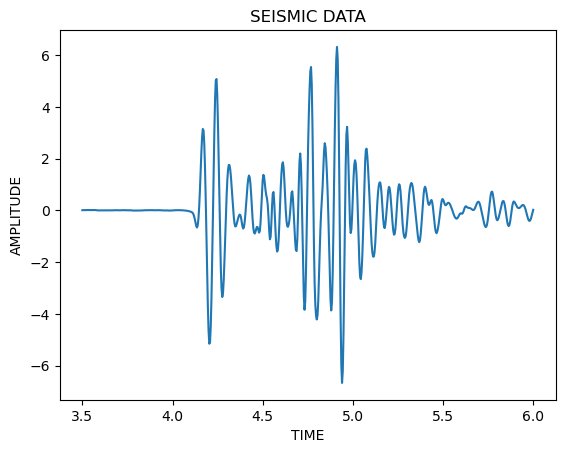

In [43]:
plt.plot(time_selected, amplitude_selected)
plt.xlabel('TIME')
plt.ylabel('AMPLITUDE')
plt.title('SEISMIC DATA')

/opt/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


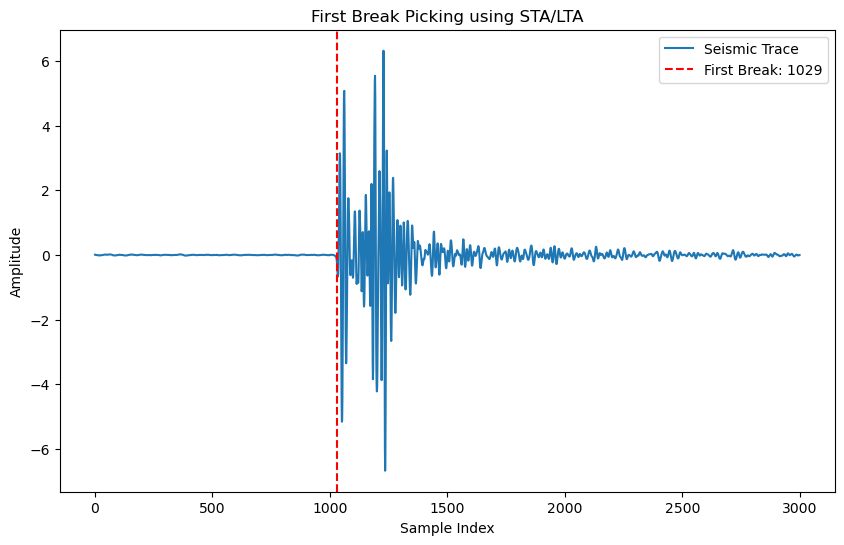

In [44]:
import numpy as np
import matplotlib.pyplot as plt

def sta_lta(trace1, sta_window, lta_window, threshold):
    n_samples = len(trace1)
    sta = np.zeros(n_samples)
    lta = np.zeros(n_samples)
    sta_lta_ratio = np.zeros(n_samples)
    
    for i in range(n_samples):
        sta[i] = np.mean(np.abs(trace1[max(0, i - sta_window):i]))
        lta[i] = np.mean(np.abs(trace1[max(0, i - lta_window):i]))
        if lta[i] > 0:
            sta_lta_ratio[i] = sta[i] / lta[i]
    
    for i in range(sta_window, n_samples):
        if sta_lta_ratio[i] > threshold:
            return i
    return -1
    
   # Example usage
sta_window = 20  
lta_window = 200  
threshold = 3.0


# First break picking
fb_index = sta_lta(trace1, sta_window, lta_window, threshold)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(trace1, label="Seismic Trace")
if fb_index != -1:
    plt.axvline(fb_index, color="r", linestyle="--", label=f"First Break: {fb_index}")
plt.title("First Break Picking using STA/LTA")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


In [107]:
df1=pd.read_csv('synthetic_well_logs.csv')
df1.head()

Depth_Well_A (m)  Log_Well_A  Depth_Well_B (m)  Log_Well_B
0          0.000000         1.0          0.000000         1.0
1          1.010101         1.0          1.010101         1.0
2          2.020202         1.0          2.020202         1.0
3          3.030303         1.0          3.030303         1.0
4          4.040404         1.0          4.040404         1.0

In [111]:
df1.columns

Index(['Depth_Well_A (m)', 'Log_Well_A', 'Depth_Well_B (m)', 'Log_Well_B'], dtype='object')

In [109]:
import matplotlib.pyplot as plt

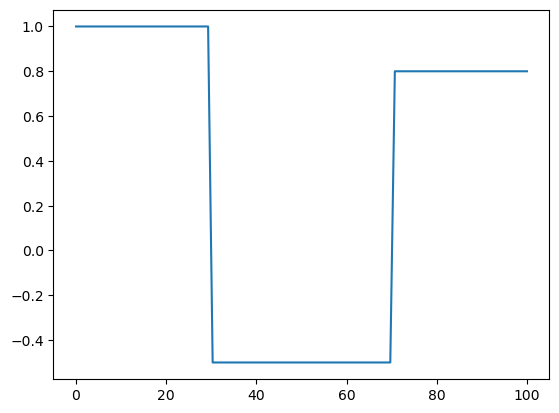

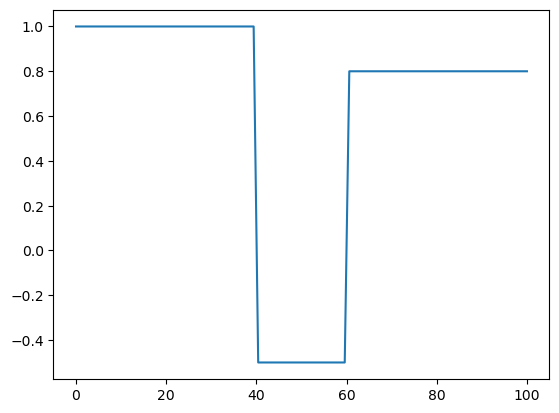

In [121]:
plt.plot(df1['Depth_Well_A (m)'],df1['Log_Well_A'])
plt.show()
plt.plot(df1['Depth_Well_B (m)'],df1['Log_Well_B'])
plt.show()